# Checkpoint Four


My dataset is https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Creating dataframe from cleaned data
df = pd.read_csv("clean_metabric.csv")

In [2]:
# Checking rows and columns of the dataframe
df.shape

(1517, 28)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1517 non-null   int64  
 1   age_at_diagnosis                1517 non-null   float64
 2   type_of_breast_surgery          1517 non-null   object 
 3   cancer_type                     1517 non-null   object 
 4   cancer_type_detailed            1517 non-null   object 
 5   cellularity                     1517 non-null   object 
 6   chemotherapy                    1517 non-null   int64  
 7   pam50_claudin_low_subtype       1517 non-null   object 
 8   cohort                          1517 non-null   float64
 9   estrogen_status                 1517 non-null   object 
 10  neoplasm_histologic_grade       1517 non-null   float64
 11  her2_status                     1517 non-null   object 
 12  tumor_other_histologic_subtype  15

In [4]:
df.head()

,Unnamed: 0,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_claudin_low_subtype,cohort,estrogen_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,progesterone_status,radio_therapy,3-gene_classifier_subtype,tumor_size,death_from_cancer,overall_survival_years
0,1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positive,...,4.02,IDC,84.63,1,Positive,1,ER+/HER2- High Prolif,10.0,Living,7
1,4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positive,...,6.08,MDLC,41.37,0,Positive,1,ER+/HER2- High Prolif,40.0,Died of Disease,3
2,5,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positive,...,4.06,IDC,7.80,0,Positive,1,ER+/HER2- High Prolif,31.0,Died of Disease,1
3,8,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positive,...,5.03,IDC,36.57,0,Negative,1,ER+/HER2- High Prolif,16.0,Died of Other Causes,3
4,9,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Positive,...,3.06,ILC,36.27,0,Negative,0,ER+/HER2- High Prolif,28.0,Died of Disease,3


In [5]:
# Checking the unique value counts
df.nunique()

Unnamed: 0                        1517
age_at_diagnosis                  1298
type_of_breast_surgery               2
cancer_type                          1
cancer_type_detailed                 5
cellularity                          3
chemotherapy                         2
pam50_claudin_low_subtype            7
cohort                               5
estrogen_status                      2
neoplasm_histologic_grade            3
her2_status                          2
tumor_other_histologic_subtype       7
hormone_therapy                      2
inferred_menopausal_state            2
integrative_cluster                 11
lymph_nodes_examined_positive       28
mutation_count                      27
nottingham_prognostic_index         85
oncotree_code                        5
overall_survival_months           1382
overall_survival                     2
progesterone_status                  2
radio_therapy                        2
3-gene_classifier_subtype            4
tumor_size               

In [6]:
# Segregating data frame to a numerical categories
num_df = ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count',
          'nottingham_prognostic_index', 'overall_survival', 'overall_survival_months', 'tumor_size','chemotherapy', ]

In [7]:
# Segregating data frame to a categorical categories
cat_df = [  'pam50_claudin_low_subtype','estrogen_status']

In [13]:
# Creating a combination of treatments
died = df[df['overall_survival']==0]
survived = df[df['overall_survival']==1]
mastectomy = (df[df['type_of_breast_surgery']=='mastectomy'])
chemo = (df[(df['chemotherapy']==1) & (df['radio_therapy']==0) & (df['chemotherapy']==0)])
radio = (df[(df['radio_therapy']==1) & (df['chemotherapy']==0) & (df['hormone_therapy']==0)])
hormone = (df[(df['hormone_therapy']==1) & (df['chemotherapy']==0) & (df['radio_therapy']==0)])  
chemo_radio = (df[(df['chemotherapy']==1) & (df['radio_therapy']==1) & (df['chemotherapy']==0)])
hormone_radio = (df[(df['hormone_therapy']==1) & (df['radio_therapy']==0) & (df['chemotherapy']==1)])
chemo_hormone = (df[(df['chemotherapy']==1) & (df['radio_therapy']==0) & (df['hormone_therapy']==1)])
all_treatment = (df[(df['chemotherapy']==1) & (df['radio_therapy']==1) & (df['chemotherapy']==1)])
no_treatment = (df[(df['chemotherapy']==0) & (df['radio_therapy']==0) & (df['chemotherapy']==0)])

In [17]:
#Dictionary of the counts for each treatment 
treatmentDict = { 'Mastectomy_counts': mastectomy, 'Chemotherapy': chemo, 'Hormone_Therapy':hormone, 'Radio_Therapy': radio}

In [25]:
df1 = pd.DataFrame.from_dict([treatmentDict])
print(df1)


                                   Mastectomy_counts  \
0  Empty DataFrame
Columns: [Unnamed: 0, age_at_d...   

                                        Chemotherapy  \
0  Empty DataFrame
Columns: [Unnamed: 0, age_at_d...   

                                     Hormone_Therapy  \
0        Unnamed: 0  age_at_diagnosis type_of_bre...   

                                       Radio_Therapy  
0        Unnamed: 0  age_at_diagnosis type_of_bre...  


Reference for below: https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d
Creating Pivot Tables: https://towardsdatascience.com/pivot-tables-in-pandas-with-hands-on-examples-in-python-9f29a48796f2

In [26]:
np.round(pd.pivot_table(df, 
                        columns=['chemotherapy', 'hormone_therapy', 'radio_therapy'], values='overall_survival', 
                                aggfunc=[np.sum]))

sum                              
chemotherapy       0                  1           
hormone_therapy    0         1        0      1    
radio_therapy      0    1    0    1   0   1  0   1
overall_survival  84  102  108  214  13  62  9  61

In [27]:
treatmentlist = [chemo, radio, hormone, chemo_radio, hormone_radio, chemo_hormone, all_treatment, no_treatment]

In [28]:
treatments = {'Chemo' : chemo, 'Radio' : radio}

In [29]:
#Get the overall survival % in 100%. 
mastectomyCounts = (df["type_of_breast_surgery"].value_counts()[1]/df["type_of_breast_surgery"].value_counts().sum())*100
chemoCounts = (df["chemotherapy"].value_counts()[1]/df["chemotherapy"].value_counts().sum())*100
hormoneCounts = (df["hormone_therapy"].value_counts()[1]/df["hormone_therapy"].value_counts().sum())*100
radioCounts = (df["radio_therapy"].value_counts()[1]/df["radio_therapy"].value_counts().sum())*100


In [30]:
#Dictionary of the survival % for each treatment 
treatmentSurvivalDict = {'Mastectomy': mastectomyCounts, 'Chemotherapy': chemoCounts, 'Hormone Therapy':hormoneCounts, 'Radio Therapy': radioCounts}

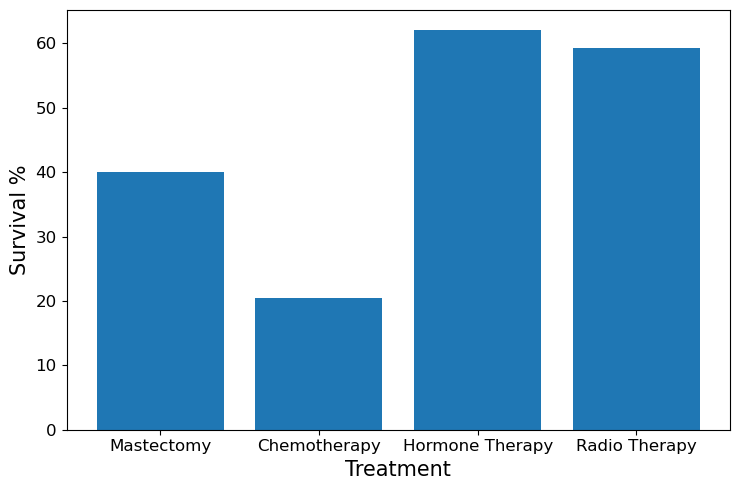

In [31]:
#Plot of each treatment 
plt.figure(figsize=(7.5,5))
plt.bar(list(treatmentSurvivalDict.keys()), list(treatmentSurvivalDict.values()))
plt.xlabel("Treatment", fontsize=15)
plt.ylabel("Survival %", fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()